# Exploratory Data Analysis- The case study of programmers

Here, is the expoloratory data analysis of the programmers around the world. In this case study we are goign to refer a csv file of **stack-overflow**.
</br>
Let's retrieve the data by using <code>import</code>.

In [1]:
!pip install squarify
import urllib.request
import squarify
urllib.request.urlretrieve("https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip","stack.zip")

Defaulting to user installation because normal site-packages is not writeable


('stack.zip', <http.client.HTTPMessage at 0x2a2af9548c0>)

In [2]:
import zipfile
import os

# Get the current working directory (where the script is saved)
current_directory = os.getcwd()

# Specify the path to the zip file (assuming it's in the same directory)
zip_file_path = os.path.join(current_directory, 'stack.zip')

# Unzip the file in the current directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(current_directory)

print(f"File unzipped to {current_directory}")


File unzipped to e:\vs code\EDA\programming EDA


The <code>stack.zip</code> file will be downloaded. After this you need to extract the <code>survey_results_schema.csv</code> and <code>survey_results_public.csv</code>

In [3]:
import pandas as pd
survey_results_raw_df=pd.read_csv("survey_results_public.csv",index_col="ResponseId")
schema_raw_df=pd.read_csv("survey_results_schema.csv")
survey_results_raw_df

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,Codecademy;Coursera,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN


Above is the csv loaded. Let's display the other file

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
survey_schema_df=pd.read_csv("survey_results_schema.csv",index_col="qname")
survey_schema_df

,qid,question,force_resp,type,selector
qname,,,,,
S0,QID16,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
MetaInfo,QID12,Browser Meta Info,False,Meta,Browser
Q310,QID310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
Q120,QID312,,True,MC,SAVR
S1,QID1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
...,...,...,...,...,...
Knowledge_7,QID289,Waiting on answers to questions often causes i...,NaN,MC,MAVR
Knowledge_8,QID289,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
Frequency_1,QID290,Needing help from people outside of your immed...,NaN,MC,MAVR


In **survey_schema_df** we only need two columns **qname** and **question**

In [5]:
schema_raw=pd.read_csv("survey_results_schema.csv", index_col="qname").question
schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
Q310           <div><span style="font-size:19px;"><strong>You...
Q120                                                            
S1             <span style="font-size:22px; font-family: aria...
                                     ...                        
Knowledge_7    Waiting on answers to questions often causes i...
Knowledge_8    I feel like I have the tools and/or resources ...
Frequency_1    Needing help from people outside of your immed...
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
Name: question, Length: 78, dtype: object

In [6]:
survey_schema_df_copy=survey_schema_df.copy()
survey_schema_df_copy.question

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
Q310           <div><span style="font-size:19px;"><strong>You...
Q120                                                            
S1             <span style="font-size:22px; font-family: aria...
                                     ...                        
Knowledge_7    Waiting on answers to questions often causes i...
Knowledge_8    I feel like I have the tools and/or resources ...
Frequency_1    Needing help from people outside of your immed...
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
Name: question, Length: 78, dtype: object

In [7]:
survey_results_raw_df.columns

Index(['Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 

In [8]:
survey_schema_df.index

Index(['S0', 'MetaInfo', 'Q310', 'Q120', 'S1', 'MainBranch', 'Age',
       'Employment', 'RemoteWork', 'CodingActivities', 'S2', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'TechList',
       'BuyNewTool', 'Country', 'Currency', 'CompTotal', 'S3', 'Language',
       'Database', 'Platform', 'Webframe', 'MiscTech', 'ToolsTech',
       'NEWCollabTools', 'OpSys', 'OfficeStackAsync', 'OfficeStackSync',
       'AISearch', 'AIDev', 'S4', 'NEWSOSites', 'SOVisitFreq', 'SOAccount',
       'SOPartFreq', 'SOComm', 'S5', 'SOAI', 'AISelect', 'AISent', 'AIAcc',
       'AIBen', 'AITool', 'AINext', 'AIOpen', 'S6', 'TBranch', 'ICorPM',
       'WorkExp', 'Knowledge', 'Frequency', 'TimeSearching', 'TimeAnswering',
       'ProfessionalTech', 'Industry', 'SOTeamsUsage', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3',
       'Knowledge_4', 'Knowledge_5', 'Knowle

## Data Preparation and Cleaning

While the survey file contains a lot of data about a lot of columns </br>
We will limit our analysis for few columns only:
* Demographics of the survey respondents and the global programming community
* Distribution of the programming skills, experience and preferences
* Employement related information, preferences and opinions

Let's select a subset of columns with the relevant data for analysis

In [9]:
selected_columns=[
    #Demographics
    "MainBranch",
    "Age",
    "Country",
    #Programming_Experiences
    "CodingActivities",
    "EdLevel",
    "DevType",
    #Employment
    "Employment",
    "RemoteWork", 
    "YearsCode",
    "YearsCodePro",
    #Artificial Intelligence
    "AISelect",
    "AISent",
    "AIAcc",
    "AIBen"    
]

The selected columns are to be analysed in this case study.

In [10]:
survey_results_df=survey_results_raw_df[selected_columns].copy()
survey_results_df

,MainBranch,Age,Country,CodingActivities,EdLevel,DevType,Employment,RemoteWork,YearsCode,YearsCodePro,AISelect,AISent,AIAcc,AIBen
ResponseId,,,,,,,,,,,,,,
1,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,25-34 years old,United States of America,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Senior Executive (C-Suite, VP, etc.)","Employed, full-time",Remote,18,9,Yes,Indifferent,Other (please explain),Somewhat distrust
3,I am a developer by profession,45-54 years old,United States of America,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","Employed, full-time","Hybrid (some remote, some in-person)",27,23,"No, and I don't plan to",NaN,NaN,NaN
4,I am a developer by profession,25-34 years old,United States of America,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end","Employed, full-time","Hybrid (some remote, some in-person)",12,7,"No, and I don't plan to",NaN,NaN,NaN
5,I am a developer by profession,25-34 years old,Philippines,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","Employed, full-time;Independent contractor, fr...",Remote,6,4,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89180,I am a developer by profession,25-34 years old,Brazil,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)","Developer, front-end","Employed, full-time;Independent contractor, fr...",Remote,20,5,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
89181,I am a developer by profession,18-24 years old,Romania,School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",5,NaN,Yes,Very favorable,Speed up learning,Somewhat trust
89182,I code primarily as a hobby,Prefer not to say,Israel,NaN,Something else,NaN,I prefer not to say,NaN,10,NaN,"No, but I plan to soon",Very favorable,NaN,Highly trust


Let's use <code>.info()</code> method to see the null values and data types.

In [11]:
survey_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89184 entries, 1 to 89184
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MainBranch        89184 non-null  object
 1   Age               89184 non-null  object
 2   Country           87973 non-null  object
 3   CodingActivities  73764 non-null  object
 4   EdLevel           87973 non-null  object
 5   DevType           76872 non-null  object
 6   Employment        87898 non-null  object
 7   RemoteWork        73810 non-null  object
 8   YearsCode         87435 non-null  object
 9   YearsCodePro      66136 non-null  object
 10  AISelect          87973 non-null  object
 11  AISent            61501 non-null  object
 12  AIAcc             38594 non-null  object
 13  AIBen             61396 non-null  object
dtypes: object(14)
memory usage: 10.2+ MB


Inerestingly the data type of is **object** for all the columns but for some of the columns we need to type case them to numerate.

In [12]:
survey_results_df.Age.unique()

array(['18-24 years old', '25-34 years old', '45-54 years old',
       '35-44 years old', 'Under 18 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [13]:
survey_results_df.Age

ResponseId
1           18-24 years old
2           25-34 years old
3           45-54 years old
4           25-34 years old
5           25-34 years old
                ...        
89180       25-34 years old
89181       18-24 years old
89182     Prefer not to say
89183    Under 18 years old
89184       35-44 years old
Name: Age, Length: 89184, dtype: object

In [14]:
survey_results_df['Age'] = survey_results_df['Age'].str.slice(0, 5)
survey_results_df['Age'].unique()

array(['18-24', '25-34', '45-54', '35-44', 'Under', '55-64', '65 ye',
       'Prefe'], dtype=object)

In [15]:
age_mapping={
    "Under":(10,17),
    "18-24":(18,24),
    "25-34":(25,34),
    "45-54":(45,54),
    "55-64":(55,64),
    "65 ye":(65,80)
}

survey_results_df["AgeRange"]=survey_results_df["Age"].map(age_mapping)
survey_results_df["AgeRange"]

ResponseId
1        (18, 24)
2        (25, 34)
3        (45, 54)
4        (25, 34)
5        (25, 34)
           ...   
89180    (25, 34)
89181    (18, 24)
89182         NaN
89183    (10, 17)
89184         NaN
Name: AgeRange, Length: 89184, dtype: object

So here in this way we have made the strings into the intervals of values</br>
Let us see on other columns

In [16]:
schema_df=survey_schema_df["question"]
schema_df

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
Q310           <div><span style="font-size:19px;"><strong>You...
Q120                                                            
S1             <span style="font-size:22px; font-family: aria...
                                     ...                        
Knowledge_7    Waiting on answers to questions often causes i...
Knowledge_8    I feel like I have the tools and/or resources ...
Frequency_1    Needing help from people outside of your immed...
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
Name: question, Length: 78, dtype: object

In [17]:
schema_df.index

Index(['S0', 'MetaInfo', 'Q310', 'Q120', 'S1', 'MainBranch', 'Age',
       'Employment', 'RemoteWork', 'CodingActivities', 'S2', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'TechList',
       'BuyNewTool', 'Country', 'Currency', 'CompTotal', 'S3', 'Language',
       'Database', 'Platform', 'Webframe', 'MiscTech', 'ToolsTech',
       'NEWCollabTools', 'OpSys', 'OfficeStackAsync', 'OfficeStackSync',
       'AISearch', 'AIDev', 'S4', 'NEWSOSites', 'SOVisitFreq', 'SOAccount',
       'SOPartFreq', 'SOComm', 'S5', 'SOAI', 'AISelect', 'AISent', 'AIAcc',
       'AIBen', 'AITool', 'AINext', 'AIOpen', 'S6', 'TBranch', 'ICorPM',
       'WorkExp', 'Knowledge', 'Frequency', 'TimeSearching', 'TimeAnswering',
       'ProfessionalTech', 'Industry', 'SOTeamsUsage', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3',
       'Knowledge_4', 'Knowledge_5', 'Knowle

In [18]:
schema_df['YearsCode']

'Including any education, how many years have you been coding in total?'

In [19]:
survey_results_df["YearsCode"].unique()

array([nan, '18', '27', '12', '6', '21', '4', '5', '20', '14', '10', '15',
       '11', '3', '24', '8', '13', 'Less than 1 year', '16', '33', '22',
       '30', '32', '7', '35', '28', '40', '17', '29', '19',
       'More than 50 years', '9', '38', '26', '34', '25', '2', '45', '23',
       '31', '43', '1', '48', '41', '50', '39', '42', '37', '36', '44',
       '46', '49', '47'], dtype=object)

In [20]:
survey_results_df["YearsCode"]=pd.to_numeric(survey_results_df.YearsCode,errors="coerce")
survey_results_df["YearsCode"].unique()

array([nan, 18., 27., 12.,  6., 21.,  4.,  5., 20., 14., 10., 15., 11.,
        3., 24.,  8., 13., 16., 33., 22., 30., 32.,  7., 35., 28., 40.,
       17., 29., 19.,  9., 38., 26., 34., 25.,  2., 45., 23., 31., 43.,
        1., 48., 41., 50., 39., 42., 37., 36., 44., 46., 49., 47.])

In [21]:
survey_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89184 entries, 1 to 89184
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MainBranch        89184 non-null  object 
 1   Age               89184 non-null  object 
 2   Country           87973 non-null  object 
 3   CodingActivities  73764 non-null  object 
 4   EdLevel           87973 non-null  object 
 5   DevType           76872 non-null  object 
 6   Employment        87898 non-null  object 
 7   RemoteWork        73810 non-null  object 
 8   YearsCode         86114 non-null  float64
 9   YearsCodePro      66136 non-null  object 
 10  AISelect          87973 non-null  object 
 11  AISent            61501 non-null  object 
 12  AIAcc             38594 non-null  object 
 13  AIBen             61396 non-null  object 
 14  AgeRange          68203 non-null  object 
dtypes: float64(1), object(14)
memory usage: 10.9+ MB


In [22]:
survey_results_df["YearsCodePro"]=pd.to_numeric(survey_results_df.YearsCodePro,errors="coerce")
survey_results_df["YearsCodePro"].unique()

array([nan,  9., 23.,  7.,  4., 21.,  3., 15., 10.,  2.,  6., 14.,  5.,
       19., 13., 16., 28.,  1., 30., 11.,  8., 25., 32., 24., 40., 17.,
       45., 29., 12., 31., 20., 18., 50., 27., 43., 22., 26., 38., 33.,
       44., 35., 34., 37., 42., 41., 47., 36., 39., 48., 46., 49.])

In [23]:
survey_results_df.describe()

,YearsCode,YearsCodePro
count,86114.000000,64217.000000
mean,13.972049,11.508354
std,10.259548,9.070346
min,1.000000,1.000000
25%,6.000000,5.000000
50%,11.000000,9.000000
75%,20.000000,16.000000
max,50.000000,50.000000


## Exploratory Data Analysis

Let's do EDA on the columns

### Main Branch

In [24]:
print(schema_df.MainBranch)

Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code". *


In [25]:
survey_results_df["MainBranch"].unique()

array(['None of these', 'I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies',
       'I code primarily as a hobby', 'I am learning to code',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

Let's plot a bar graph to show the number of responses.

Text(0.5, 1.0, 'Your working branch')

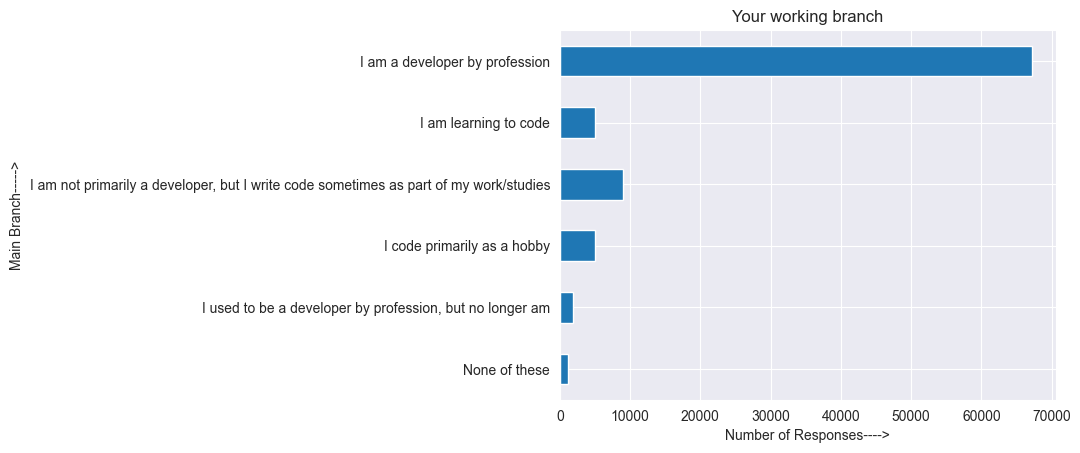

In [26]:
#Count the number of main branch
import seaborn as sns
sns.set_style("darkgrid")

cat_counts=survey_results_df["MainBranch"].value_counts()

cat_counts=cat_counts.sort_index(ascending=False)
#Plotting the bar graph
cat_counts.plot.barh()
plt.xlabel("Number of Responses---->")
plt.ylabel("Main Branch----->")
plt.title("Your working branch")

Lets visualise this with the help of a pie chart graph

<Axes: title={'center': 'Define Yourself'}, ylabel=' '>

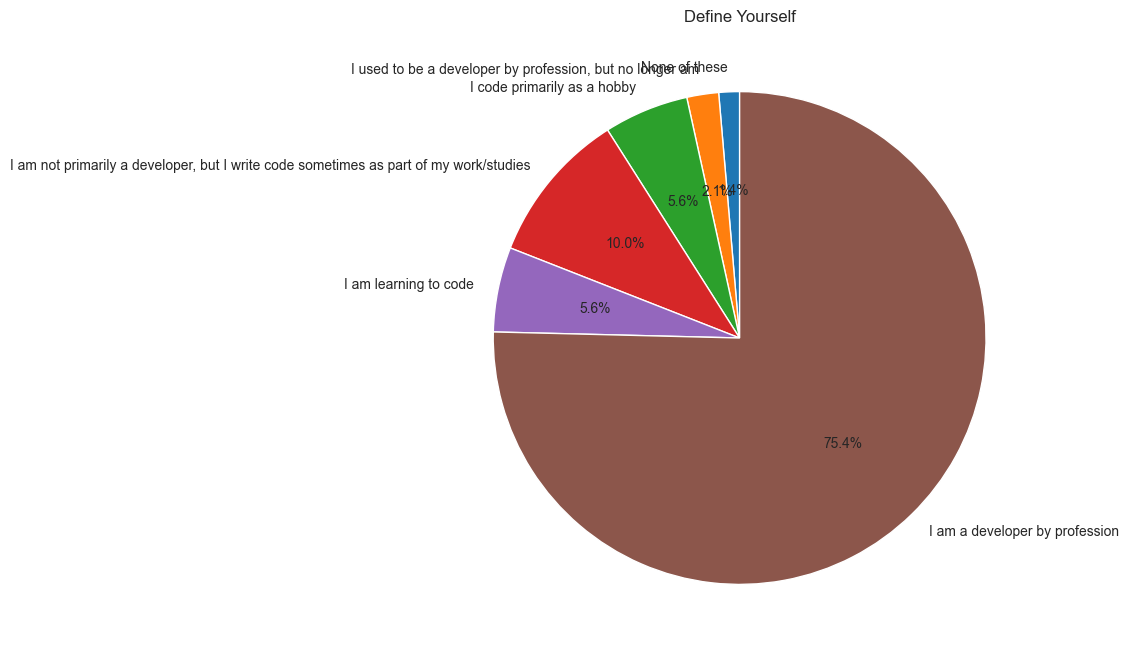

In [27]:
cat_counts.plot.pie(autopct='%1.1f%%',
          startangle=90,
          figsize=(8,8),
          title="Define Yourself",
          ylabel=" ")

It seems that out of 100 developers using the stack overflow maximum are developers by profession around 75 percent of the crowd is developer by profession followed by the coders who code as the part of their studies and work.
**Insights-**
> * The maximum users of stackoverflow are developer by profession
> * The learners percentage is 5.6 % which seems quite low which implicates that the stackoverflow is not much used by the learners 
> * The chart also shows that the people who code primarily as hobby are not much which means the stackoverflow are more friendly to the profeesionals only and apart from that coders may prefer other websites to learn.

### Age

Lets visualise the age column

In [28]:
schema_df.Age

'What is your age? *'

In [29]:
survey_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89184 entries, 1 to 89184
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MainBranch        89184 non-null  object 
 1   Age               89184 non-null  object 
 2   Country           87973 non-null  object 
 3   CodingActivities  73764 non-null  object 
 4   EdLevel           87973 non-null  object 
 5   DevType           76872 non-null  object 
 6   Employment        87898 non-null  object 
 7   RemoteWork        73810 non-null  object 
 8   YearsCode         86114 non-null  float64
 9   YearsCodePro      64217 non-null  float64
 10  AISelect          87973 non-null  object 
 11  AISent            61501 non-null  object 
 12  AIAcc             38594 non-null  object 
 13  AIBen             61396 non-null  object 
 14  AgeRange          68203 non-null  object 
dtypes: float64(2), object(13)
memory usage: 10.9+ MB


Let's plot a Bar Graph for this

In [30]:
survey_results_df["AgeRange"].unique()

array([(18, 24), (25, 34), (45, 54), nan, (10, 17), (55, 64), (65, 80)],
      dtype=object)

Text(0.5, 1.0, 'Programmers of different age group')

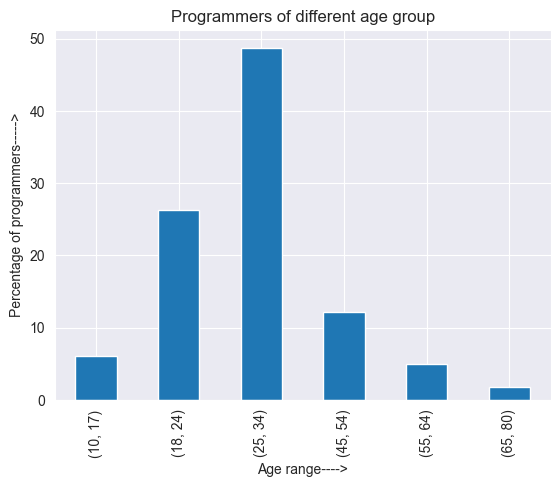

In [31]:
age_count=survey_results_df["AgeRange"].value_counts()
total=age_count.sum()
desired_order = [(10, 17),(18, 24), (25, 34),  (45, 54), (55, 64), (65, 80)]
age_count_reordered = age_count.reindex(desired_order)
age_percentage=age_count_reordered/total * 100
age_percentage.plot.bar();
plt.xlabel("Age range---->")
plt.ylabel("Percentage of programmers----->")
plt.title("Programmers of different age group")

From the previous graphs we have known that the maximum user of stackoverflow are actually professional developers which trends is also seen in the following graph.
**Insights**
>  * The part of the crowd that uses the stackoverflow in the age range of 10-17 seems to be using it for the studies or work that is around 5 percent
>  * The maximum crowd seems to be in the age range of 18-24, 25-34, which seems to be the professionals developers and this percentage falls with the age 
> *  The last mere scrap of the crowd of people seems to be the one that is using the stackoverflow but have left the work of being a professional developer

### Distribution of the coders with their working profession

In [32]:
survey_results_df[survey_results_df.MainBranch=='I am a developer by profession']

,MainBranch,Age,Country,CodingActivities,EdLevel,DevType,Employment,RemoteWork,YearsCode,YearsCodePro,AISelect,AISent,AIAcc,AIBen,AgeRange
ResponseId,,,,,,,,,,,,,,,
2,I am a developer by profession,25-34,United States of America,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Senior Executive (C-Suite, VP, etc.)","Employed, full-time",Remote,18.0,9.0,Yes,Indifferent,Other (please explain),Somewhat distrust,"(25, 34)"
3,I am a developer by profession,45-54,United States of America,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","Employed, full-time","Hybrid (some remote, some in-person)",27.0,23.0,"No, and I don't plan to",NaN,NaN,NaN,"(45, 54)"
4,I am a developer by profession,25-34,United States of America,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end","Employed, full-time","Hybrid (some remote, some in-person)",12.0,7.0,"No, and I don't plan to",NaN,NaN,NaN,"(25, 34)"
5,I am a developer by profession,25-34,Philippines,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","Employed, full-time;Independent contractor, fr...",Remote,6.0,4.0,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,"(25, 34)"
6,I am a developer by profession,35-44,United Kingdom of Great Britain and Northern I...,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,"Developer, back-end","Employed, full-time",Remote,21.0,21.0,Yes,Favorable,Greater efficiency,Somewhat trust,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,I am a developer by profession,45-54,United States of America,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","Employed, full-time",Remote,25.0,22.0,"No, but I plan to soon",Favorable,NaN,Somewhat distrust,"(45, 54)"
89180,I am a developer by profession,25-34,Brazil,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)","Developer, front-end","Employed, full-time;Independent contractor, fr...",Remote,20.0,5.0,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,"(25, 34)"
89181,I am a developer by profession,18-24,Romania,School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",5.0,NaN,Yes,Very favorable,Speed up learning,Somewhat trust,"(18, 24)"


Text(0.5, 1.0, 'Programmers of different age group')

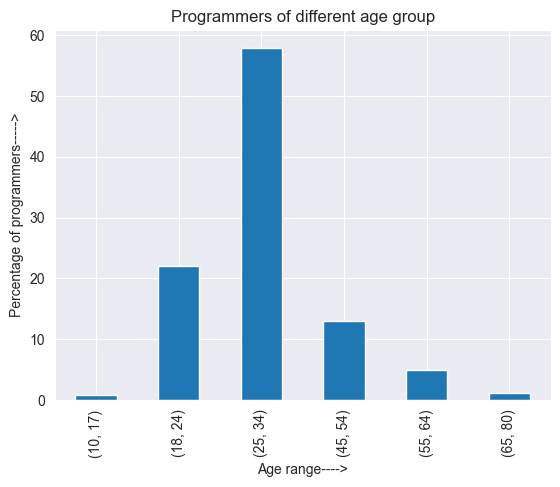

In [33]:
age_count=survey_results_df[survey_results_df.MainBranch=='I am a developer by profession'].AgeRange.value_counts()
total=age_count.sum()
desired_order = [(10, 17),(18, 24), (25, 34),  (45, 54), (55, 64), (65, 80)]
age_count_reordered = age_count.reindex(desired_order)
age_percentage=age_count_reordered/total * 100
age_percentage.plot.bar();
plt.xlabel("Age range---->")
plt.ylabel("Percentage of programmers----->")
plt.title("Programmers of different age group")

In [34]:
# Assuming survey_results_df is already defined and contains the data

# Group by MainBranch and AgeRange, then count
age_dev = survey_results_df.groupby("MainBranch")[["AgeRange"]].value_counts().unstack(fill_value=0)
age_dev

AgeRange,"(10, 17)","(18, 24)","(25, 34)","(45, 54)","(55, 64)","(65, 80)"
MainBranch,,,,,,
I am a developer by profession,422,11002,28848,6487,2449,594
I am learning to code,891,2733,810,113,48,12
"I am not primarily a developer, but I write code sometimes as part of my work/studies",401,2396,2521,1063,503,175
I code primarily as a hobby,2305,1454,378,177,127,161
"I used to be a developer by profession, but no longer am",10,87,406,369,200,188
None of these,99,259,284,125,65,41


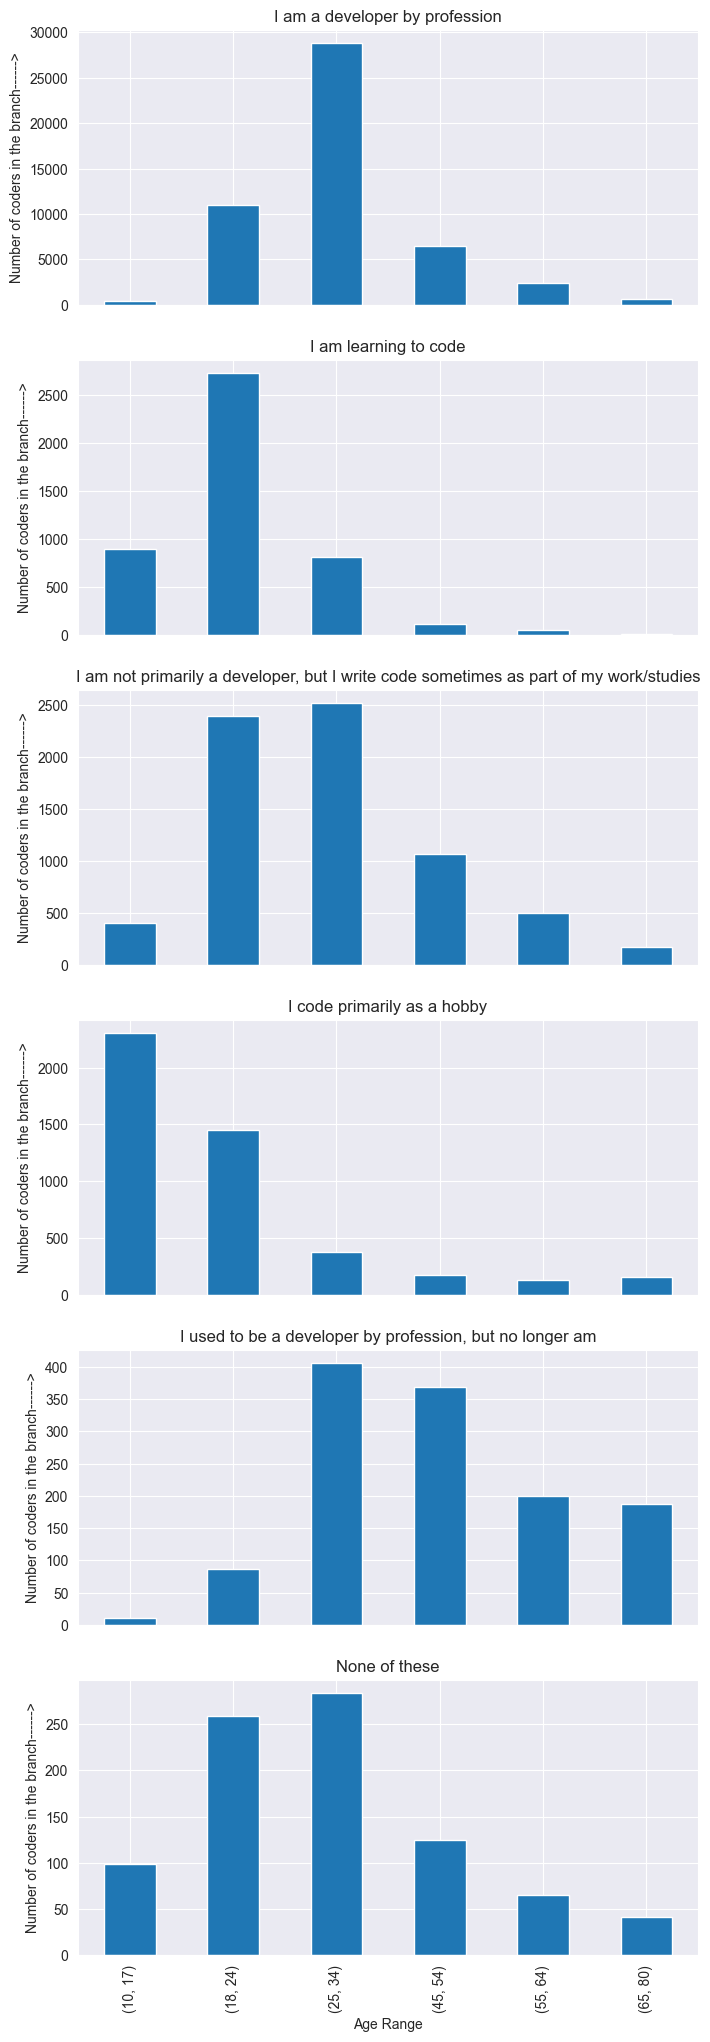

In [35]:


fig, axes = plt.subplots(nrows=len(age_dev), ncols=1, figsize=(8, 25), sharex=True)

# Loop through each MainBranch and create a bar plot
for (branch, data), ax in zip(age_dev.iterrows(), axes):
    data.plot(kind='bar', ax=ax, legend=False)
    ax.set_title(branch)
    ax.set_ylabel('Number of coders in the branch------>')
    ax.set_xlabel('Age Range')

plt.show()


**Insights**
> * I am a developer by profession- In this graph we can see that the maximum professional developers are in the age group of 18-34.
> * I am learning to code- This branch consist the maximum crowd from the the age group of 10-24 which is usually the age of learning of coders.
> * I am not primarily a developer, but I write code sometimes as part of my work/studies- It seems that the students and professional from other background then coding also code as a learner as part of their work/studies because the maximum coders in this branch are from 18-54 years of age.
> * I code primarily as a hobby- Coding as an interest of hobby this can be seen reducing with the age as it was maximum in the 10-17 age interval and minimum in the end
> * I used to be a developer by profession, but no longer am- It is interesting that the age range from 25-34 have switched their career from developer to somewhere else because this is usually the age range where they would have started to work as a developer.
 

### Country

In [36]:
#The Participation of the programmers across each country
country_count=survey_results_df.Country.value_counts()

As we can see that there are too many values with less than 1 percentage. Let's combine them to a value **other**.

In [37]:
total=survey_results_df.Country.count()
print(total)
dpie=survey_results_df.Country.value_counts().to_frame()
dpie["Percentage"]=dpie/total*100
high_p=dpie[dpie["Percentage"]>0.5]
low_p=dpie[dpie["Percentage"]<=0.5]
Others=pd.DataFrame({"Others":[low_p["count"].sum(),low_p["count"].sum()/total*100]})
Others=Others.T
Others.columns=["count","Percentage"]
dpie_fina=pd.concat([high_p,Others])
dpie_fina
#Others=pd.DataFrame({"Country":})

87973


,count,Percentage
United States of America,18647.0,21.196276
Germany,7328.0,8.329828
India,5625.0,6.394007
United Kingdom of Great Britain and Northern Ireland,5552.0,6.311027
Canada,3507.0,3.986450
France,2933.0,3.333977
Poland,2435.0,2.767895
Netherlands,2383.0,2.708786
Australia,2078.0,2.362088
Brazil,2042.0,2.321167


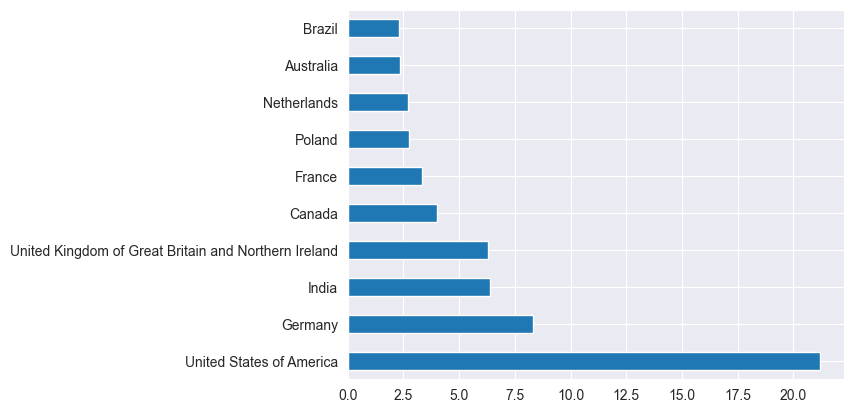

In [38]:
dpie_fina["Percentage"].head(10).plot.barh()
plt.xlabel="Country---->"
plt.ylabel="Percentage of coders-->"
plt.show()

**Insights**
> * The United States of America has the maxmimum users of stackoverflow followed by Germany and India. Germany is a much smaller country and has a less population relative to India and USA so it seems that the devlopers are there are much more passionate to code.
> * By looking at the trends we actually can not say the reasons for these trends,

For particularly in United States of America let's see the age range composition of coders

<Axes: ylabel='MainBranch'>

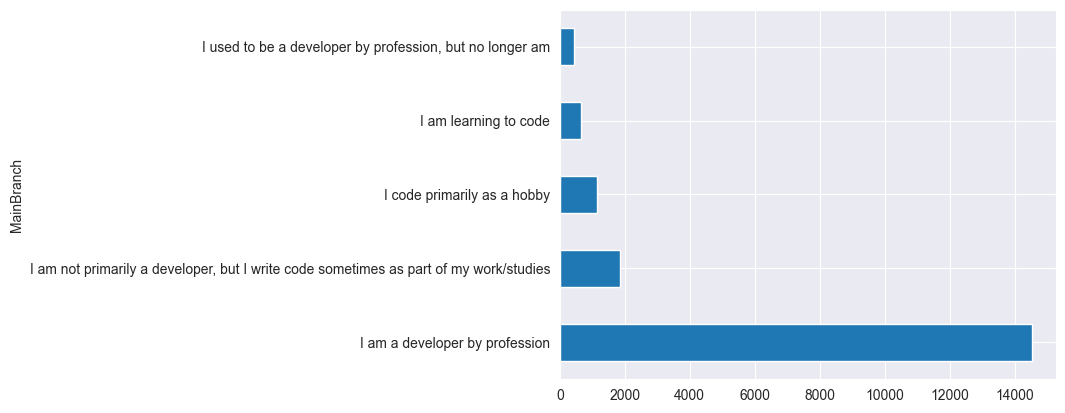

In [39]:
survey_results_df[survey_results_df.Country=="United States of America"].MainBranch.value_counts().plot.barh()

### CodingActivities

In [40]:
print(survey_results_df["CodingActivities"].value_counts())
print(survey_results_df["CodingActivities"].count())
print(schema_df["CodingActivities"])

CodingActivities
Hobby                                                                                                                                                                                                      15308
I don’t code outside of work                                                                                                                                                                                8809
Hobby;Professional development or self-paced learning from online courses                                                                                                                                   8232
Hobby;Contribute to open-source projects                                                                                                                                                                    5363
Professional development or self-paced learning from online courses                                                                                

In the column coding activity multiple columns are chosen but for the simplicity we will ignore the values where the number of choosing is less than 800 and will combine them into other category. As we did before let's do it again.

In [41]:
total=survey_results_df.CodingActivities.count()
print(total)
cpie=survey_results_df.CodingActivities.value_counts().to_frame()
cpie["Percentage"]=cpie/total*100
high_c=cpie[cpie["Percentage"]>0.5]
low_c=cpie[cpie["Percentage"]<=0.5]
Others=pd.DataFrame({"Others":[low_c["count"].sum(),low_c["count"].sum()/total*100]})
Others=Others.T
Others.columns=["count","Percentage"]
cpie_fina=pd.concat([high_c,Others])
cpie_fina
#Others=pd.DataFrame({"Country":})

73764


,count,Percentage
Hobby,15308.0,20.752671
I don’t code outside of work,8809.0,11.942140
Hobby;Professional development or self-paced learning from online courses,8232.0,11.159915
Hobby;Contribute to open-source projects,5363.0,7.270484
Professional development or self-paced learning from online courses,3920.0,5.314245
Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses,3194.0,4.330025
Hobby;Freelance/contract work,2266.0,3.071959
Hobby;School or academic work,1855.0,2.514777
Hobby;Professional development or self-paced learning from online courses;Freelance/contract work,1637.0,2.219240
Freelance/contract work,1632.0,2.212461


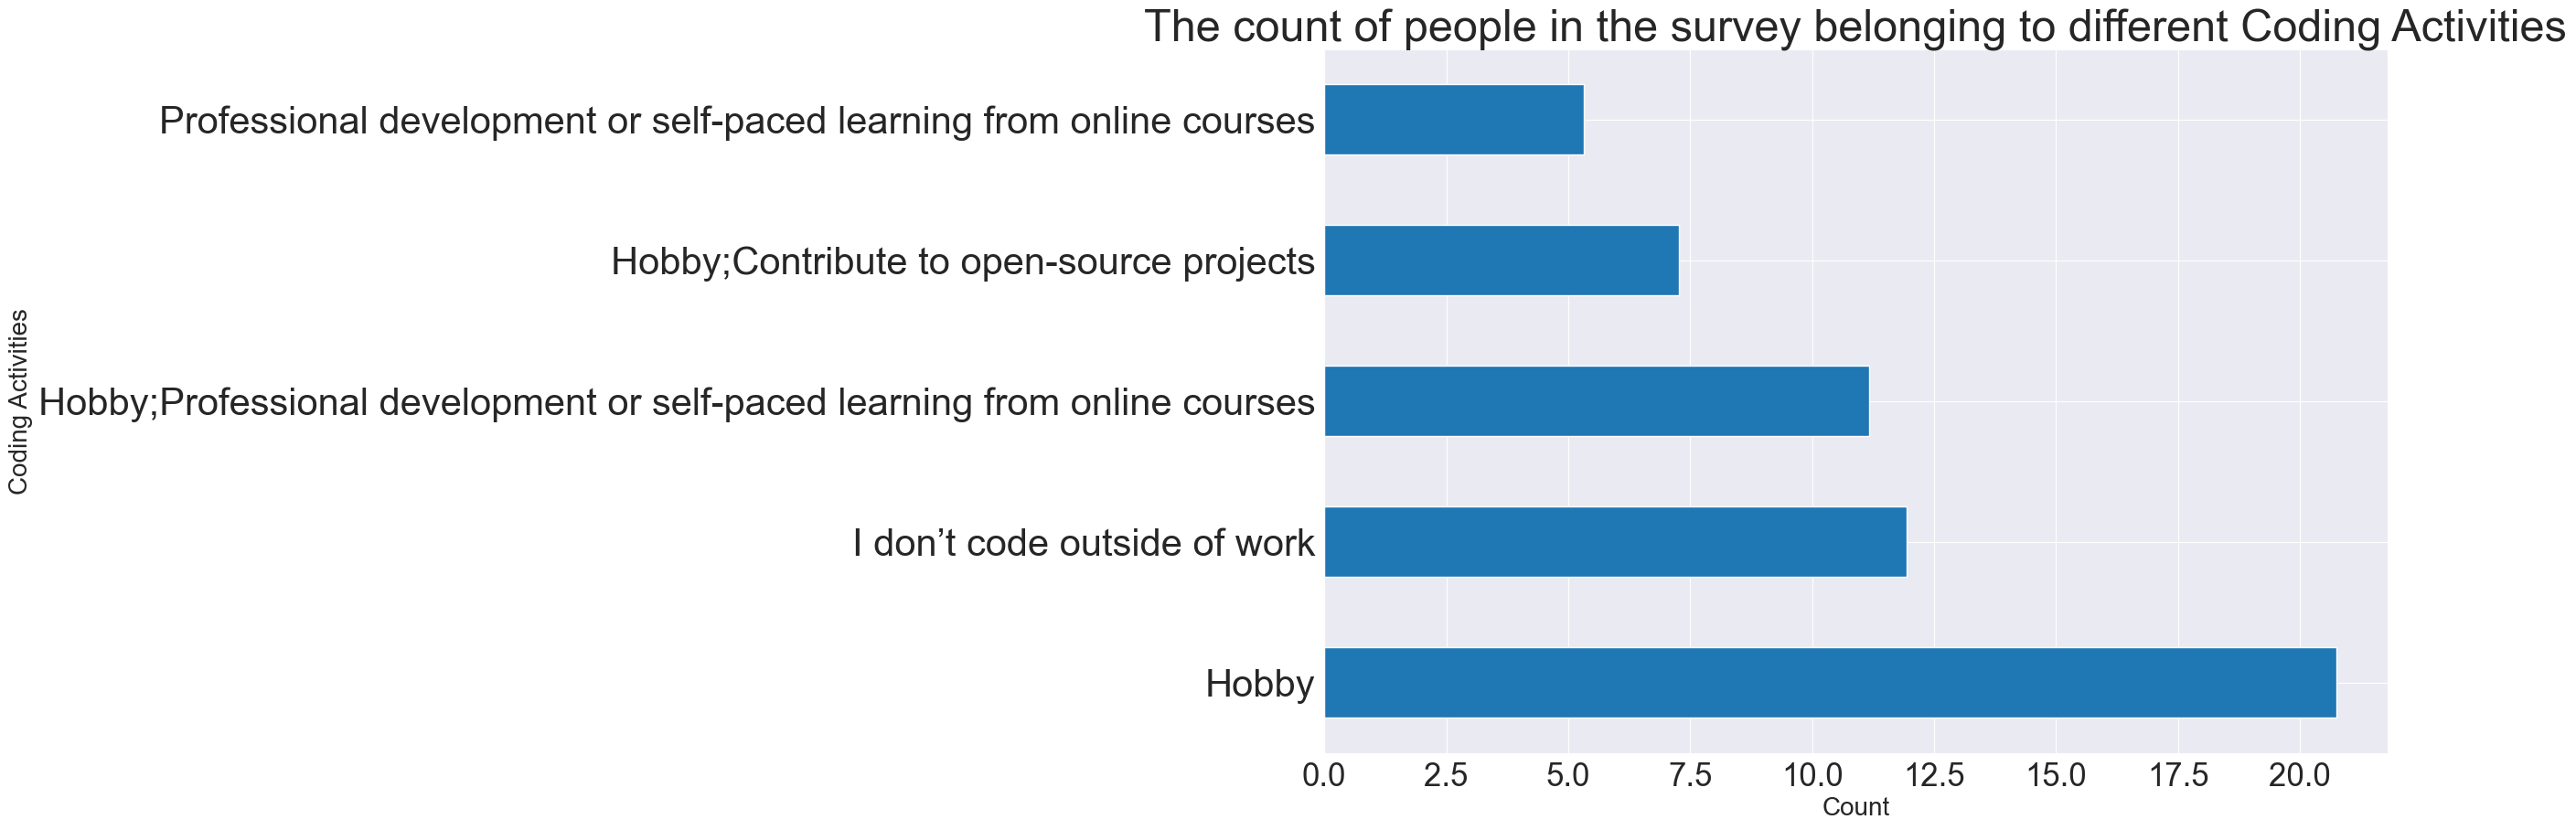

In [42]:
plt.figure(figsize=(15,10))
ax=cpie_fina["Percentage"].head().plot.barh()
ax.set_title("The count of people in the survey belonging to different Coding Activities", fontsize=35)
ax.set_xlabel("Count", fontsize=20)
ax.set_ylabel("Coding Activities", fontsize=20)

# Customize the font size of tick labels
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=30)

plt.show()

This section describes the code the coders write outside of work. </br>
**Insights**
> * Maximum of the users are professionals and of the working age who either code as a hobby or dont code outside the work
> * A significant amount of coders seem to be leraning further by contributing to open source prijects and learning from online courses.

### Education Level  

In [43]:
schema_df.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [44]:
survey_results_df["EdLevel"].unique()

array([nan, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

We can visualise this by bar graph. Let us do it

Text(0, 0.5, 'The highest degree they have ----->')

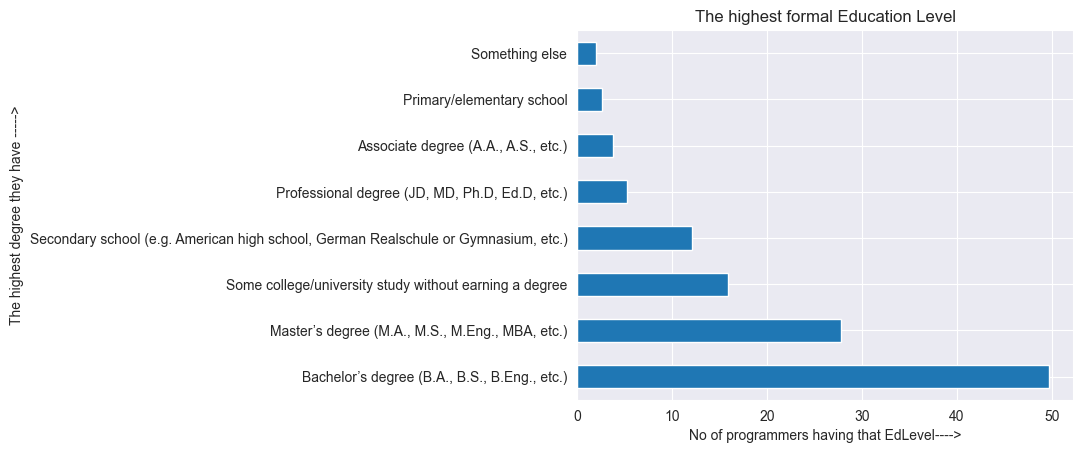

In [45]:
a=survey_results_df.EdLevel.value_counts()/total * 100
b=a.plot.barh()
b.set_xlabel("No of programmers having that EdLevel---->")
plt.title("The highest formal Education Level")
b.set_ylabel("The highest degree they have ----->")

The Highest formal education level showcases that the maximum programmers refer to what education level </br>
**Insights**
> * The maximum coders are of the Bachelor's degree which shows that though theu are professional dvelopers but they dont have a high formal education.
> * Though we dont have any knowledge of in which stream they have studied so it s hard to find if they all have the formal education in the develper category.
> * The professional degree seems to be quite low there can be a couple of reasons for it. Firstly, there are less number of people acquiring the degree also the developers dont may not seek a professinal degree like Ph.D to seek a job.
> * Even so we can see there is a signinficant number of prgrammers who have not earned a degree yet which is interesting to know because there are very less people who are not professionals.

Let us plot this graph for the professional developers only

<Axes: ylabel='EdLevel'>

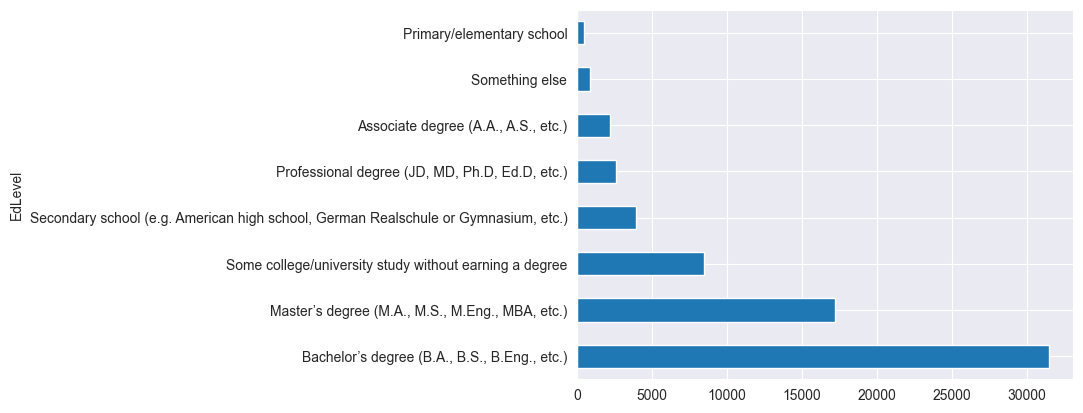

In [46]:
survey_results_df[survey_results_df.MainBranch=="I am a developer by profession"].EdLevel.value_counts().plot.barh()

It is interesting to understand that over 7000 professional developers done have a degree this is a good sign for the programming world.

### DevType  

In [47]:
len(survey_results_df.DevType.unique())

34

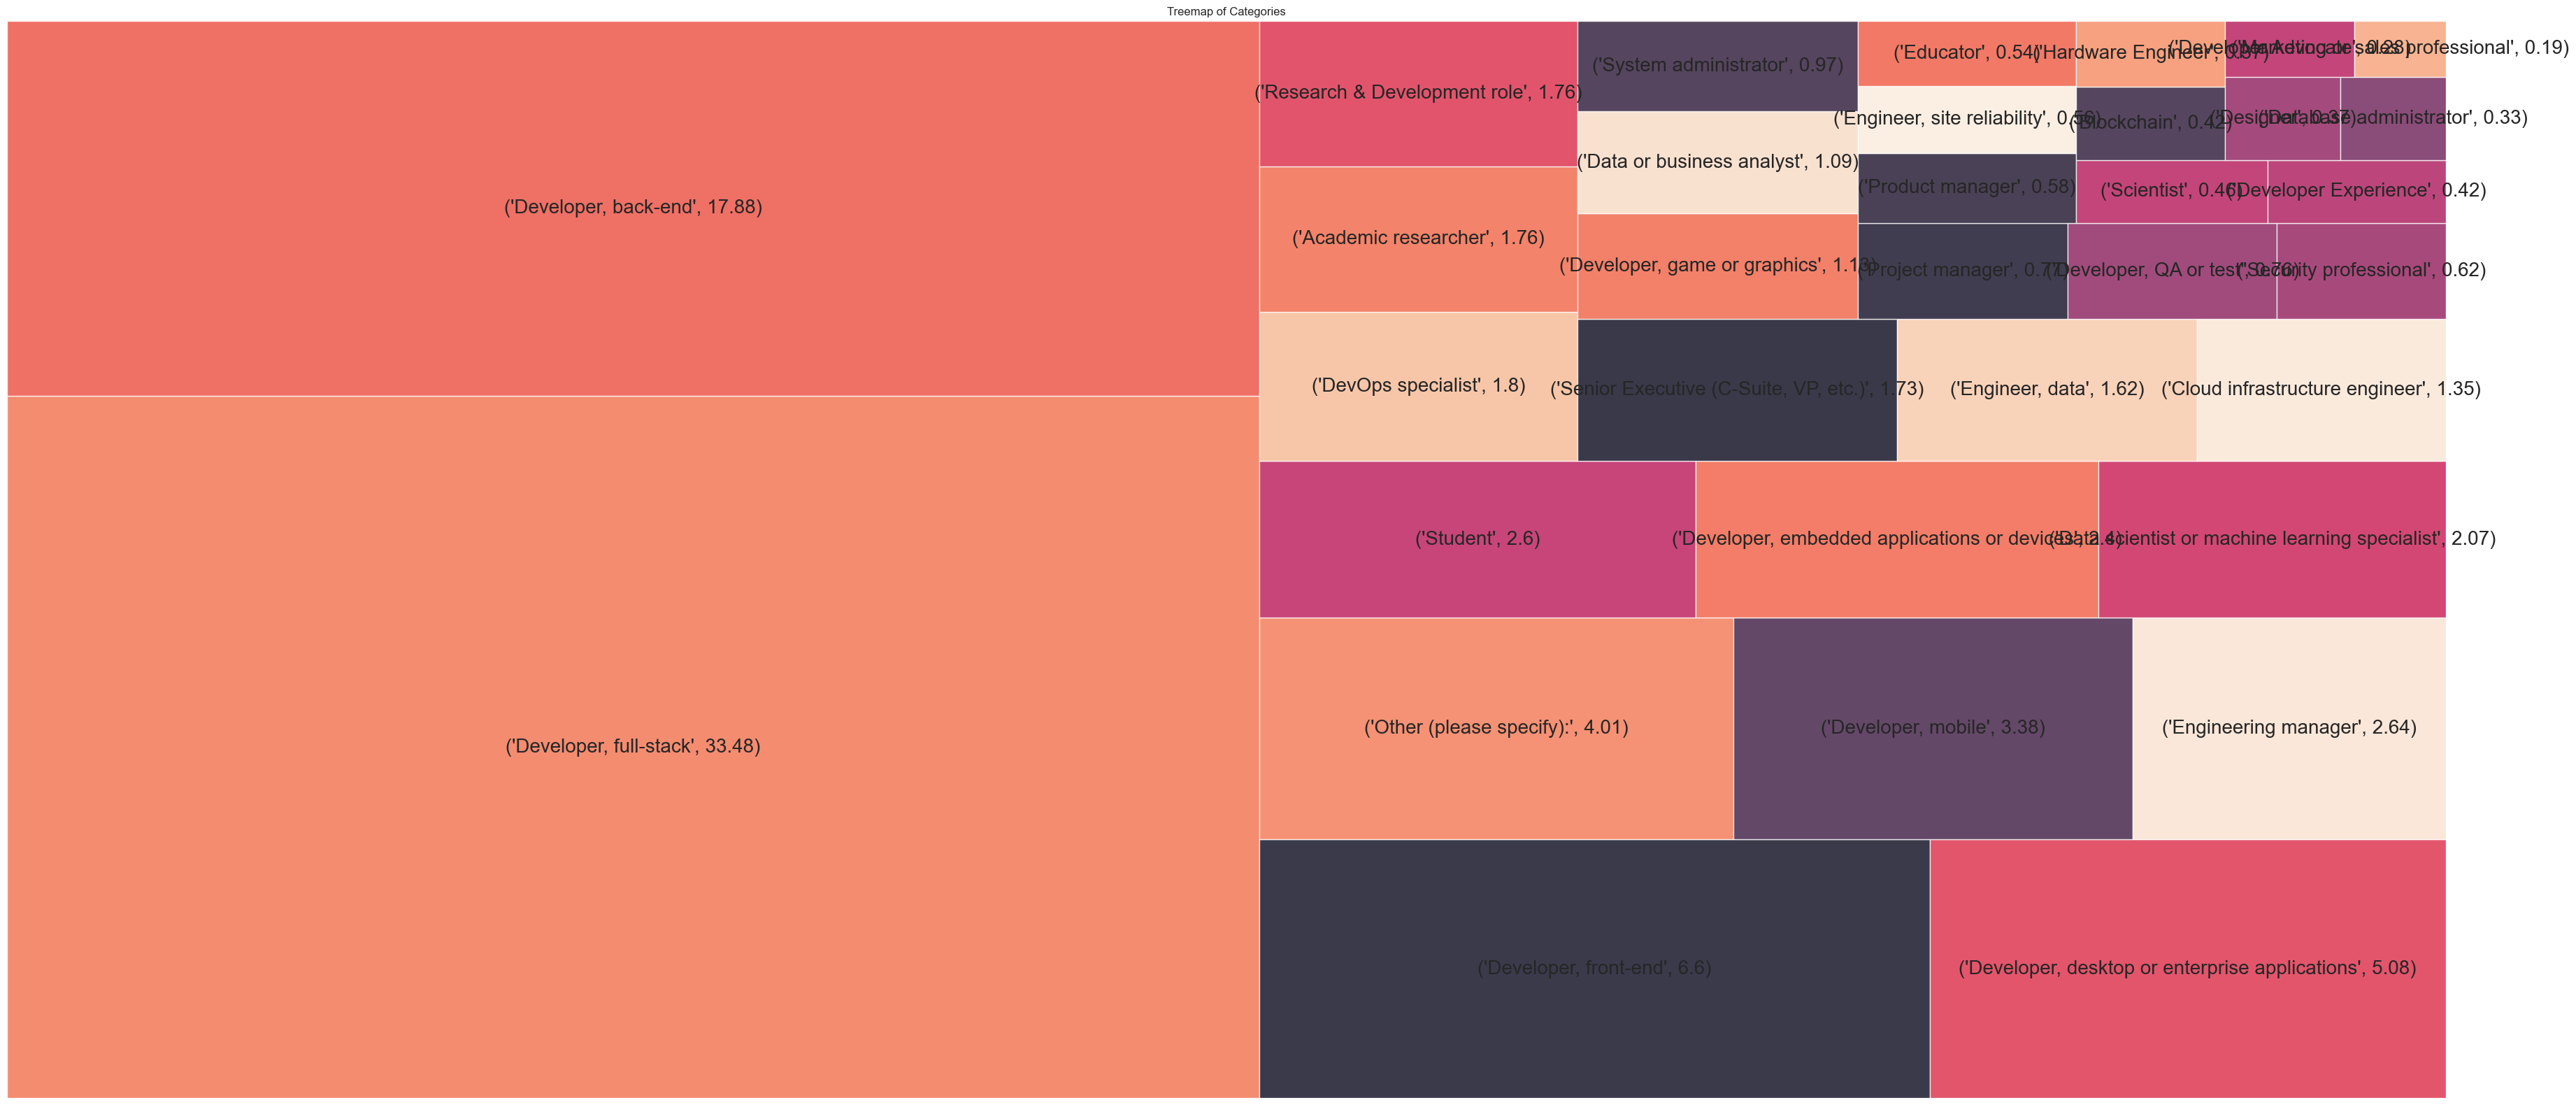

In [48]:
total=survey_results_df.DevType.value_counts().sum()
a=round(survey_results_df.DevType.value_counts()/total*100,2)
a=a.to_dict()
# Plot
plt.figure(figsize=(45, 20))
squarify.plot(sizes=survey_results_df.DevType.value_counts(),label=a.items(),  alpha=.8,text_kwargs={'fontsize': 20})
plt.axis('off')
plt.title('Treemap of Categories')
plt.show()


Text(0.5, 1.0, 'Type of developers')

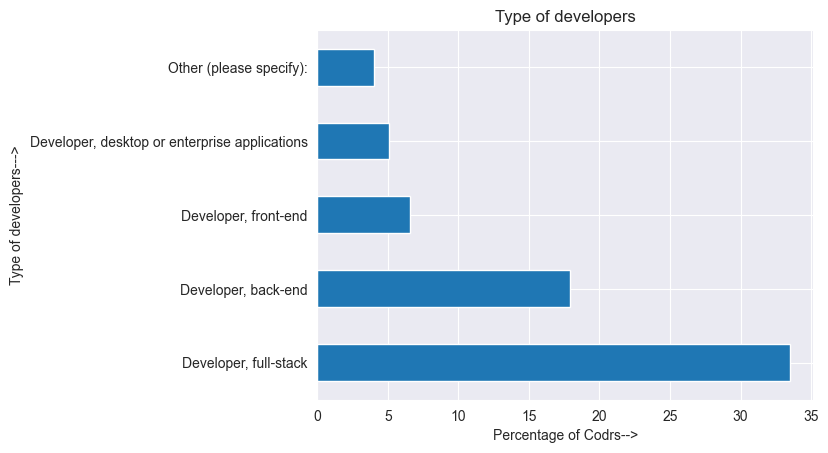

In [49]:
s=survey_results_df.DevType.value_counts()/total * 100
g=s.head().plot.barh()
g.set_xlabel("Percentage of Codrs-->")
g.set_ylabel("Type of developers--->")
plt.title("Type of developers")

The stackoverflow website has the different sort of developers let's analyse a bit of these </br>
**Insights**
> * Maximum developers are full stack
> * We can see there is a large difference between the back end developer and the front end developer
> * More research can be done to find the reason about this.

### Employement

In [50]:
survey_results_df.Employment.unique()
survey_results_df.Employment.value_counts()

Employment
Employed, full-time                                                                                                                  53748
Student, full-time                                                                                                                    7430
Independent contractor, freelancer, or self-employed                                                                                  7076
Employed, full-time;Independent contractor, freelancer, or self-employed                                                              4354
Not employed, but looking for work                                                                                                    2553
                                                                                                                                     ...  
Independent contractor, freelancer, or self-employed;Student, full-time;Student, part-time;Not employed, and not looking for work        1
Employed, full-t

In [51]:
total=survey_results_df.Employment.count()
print(total)
sq=survey_results_df. Employment.value_counts().to_frame()
sq["Percentage"]=sq/total*100
high_s=sq[sq["Percentage"]>0.5]
low_s=sq[sq["Percentage"]<=0.5]
Others=pd.DataFrame({"Others":[low_s["count"].sum(),low_s["count"].sum()/total*100]})
Others=Others.T
Others.columns=["count","Percentage"]
sq_fina=pd.concat([high_s,Others])
sq_fina

87898


,count,Percentage
"Employed, full-time",53748.0,61.148149
"Student, full-time",7430.0,8.452980
"Independent contractor, freelancer, or self-employed",7076.0,8.050240
"Employed, full-time;Independent contractor, freelancer, or self-employed",4354.0,4.953469
"Not employed, but looking for work",2553.0,2.904503
"Employed, part-time",1644.0,1.870350
"Student, full-time;Employed, part-time",1392.0,1.583654
"Employed, full-time;Student, part-time",1028.0,1.169537
"Employed, full-time;Student, full-time",923.0,1.050081
"Not employed, and not looking for work",844.0,0.960204


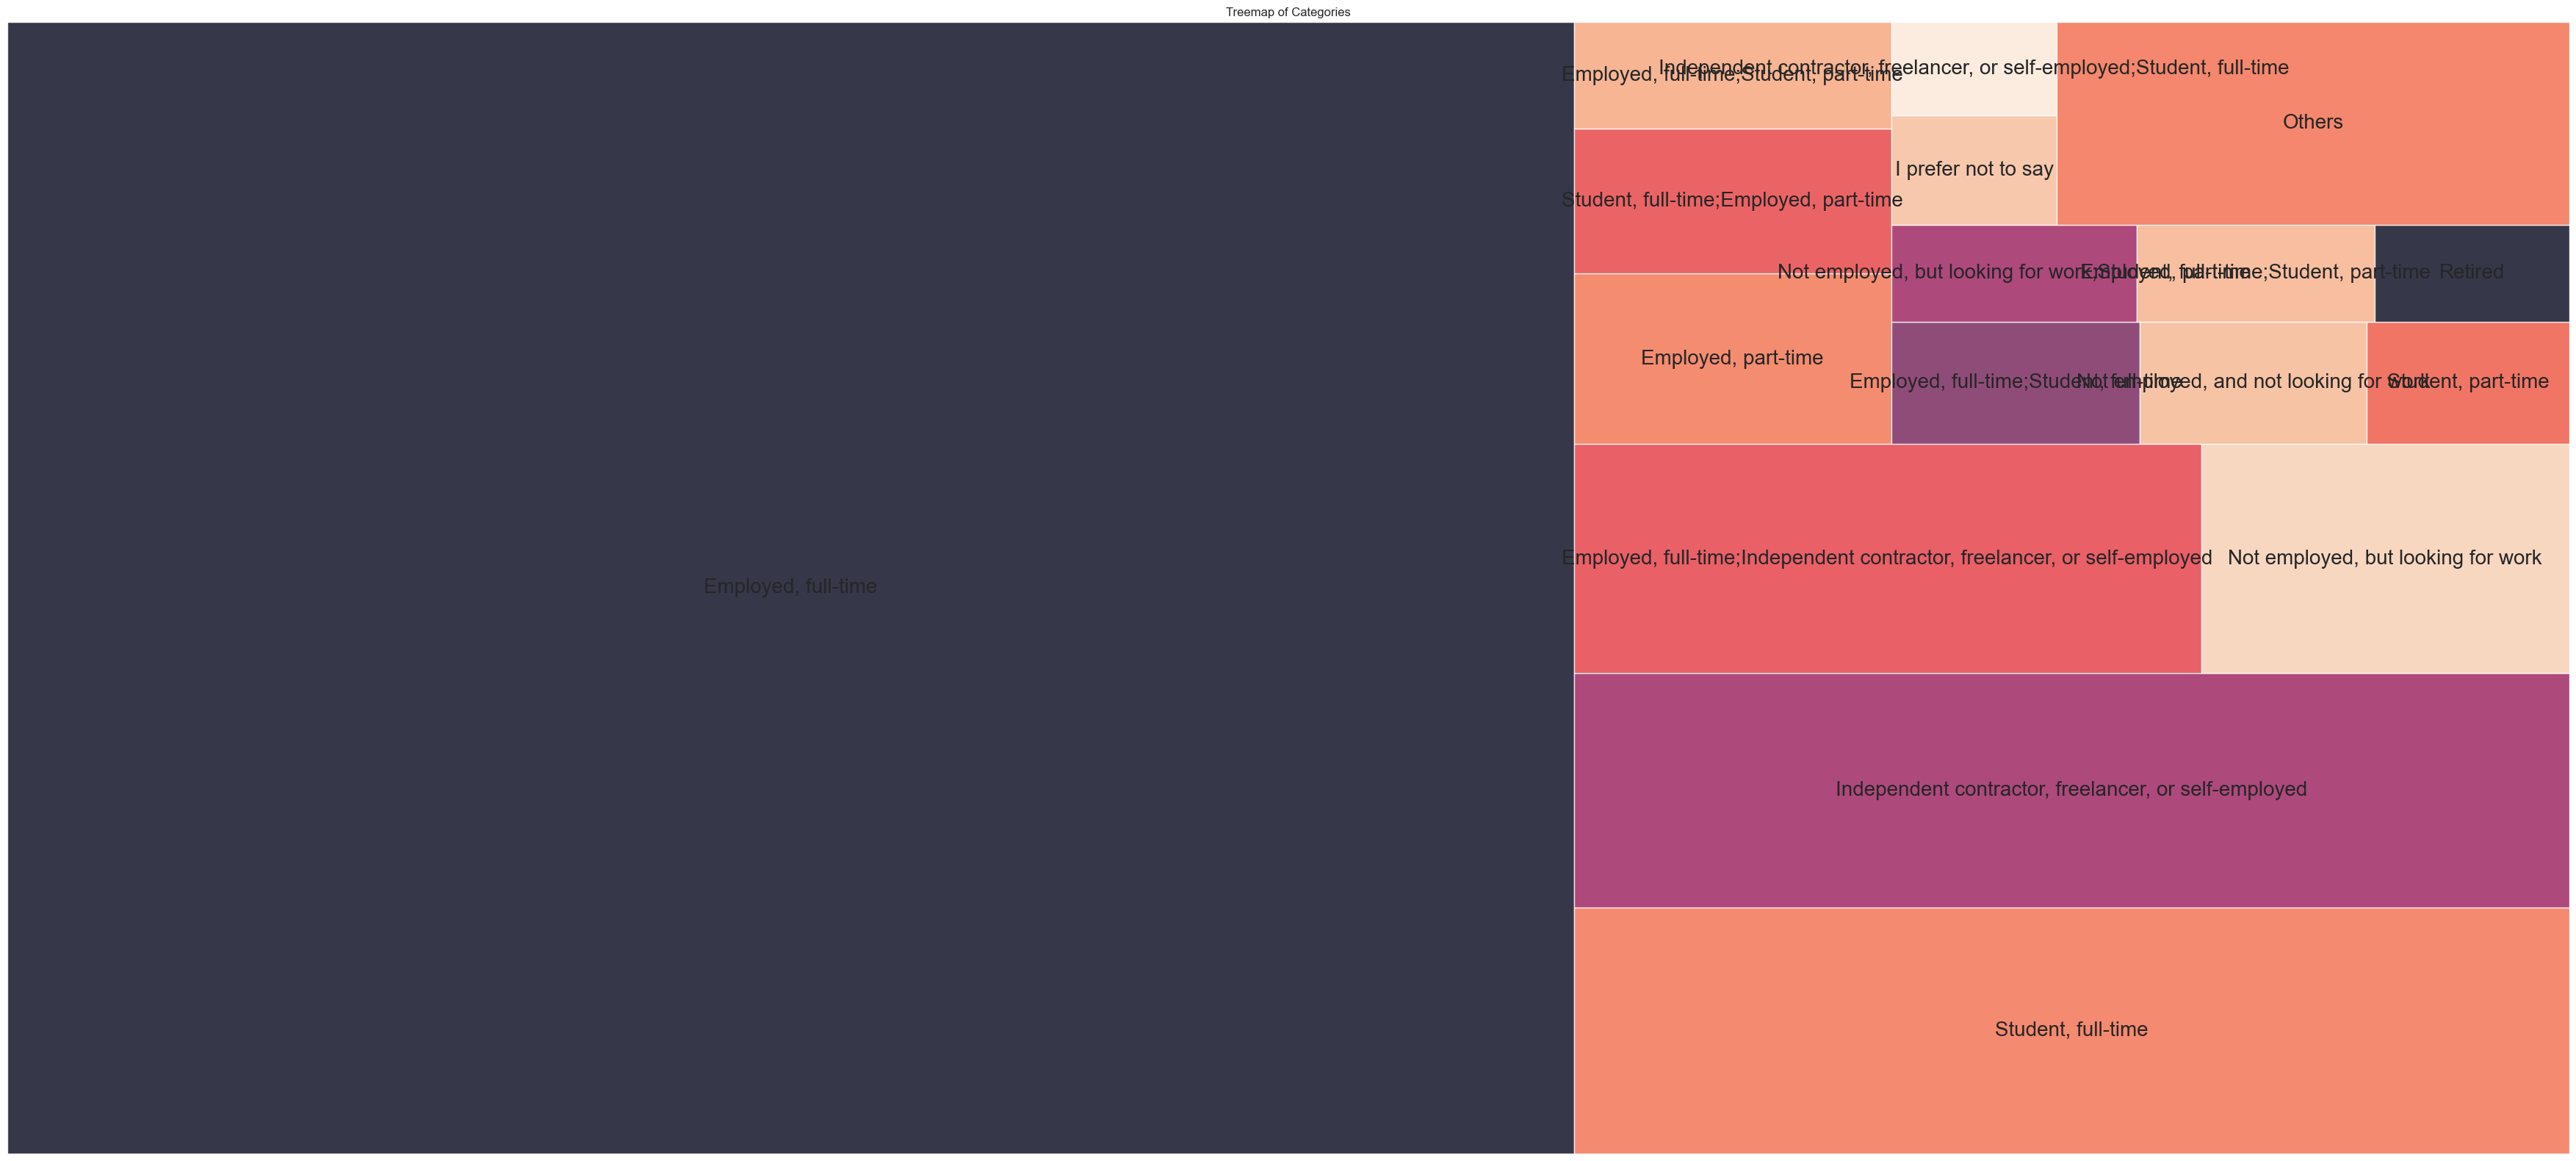

In [52]:
sq_grp=sq_fina["Percentage"]
dicti=sq_fina.Percentage.to_dict
# Plot
plt.figure(figsize=(45, 20))
squarify.plot(sizes=sq_fina["count"],label=sq_fina.index ,  alpha=.8,text_kwargs={'fontsize': 20})
plt.axis('off')
plt.title('Treemap of Categories')
plt.show()


<Axes: >

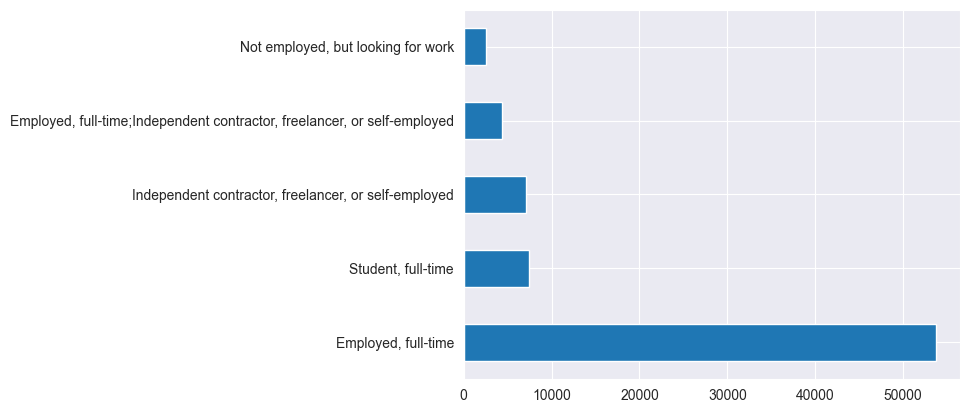

In [53]:
sq_fina["count"].head().plot.barh()

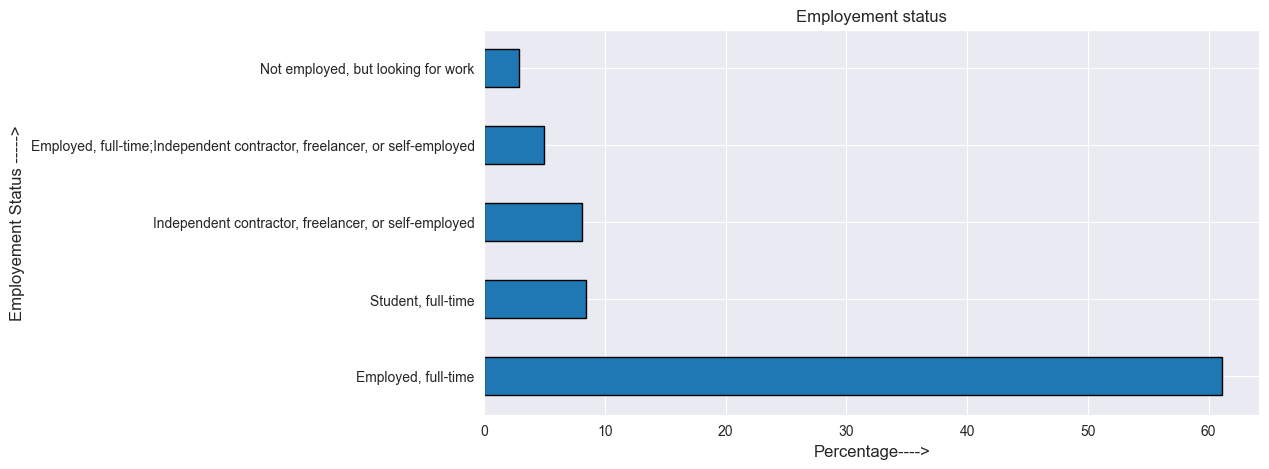

In [54]:
ax=sq_fina["Percentage"].head().plot.barh(figsize=(10, 5),edgecolor='black')
ax.set_xlabel("Percentage---->",fontsize=12)
plt.title("Employement status")
ax.set_ylabel("Employement Status ----->",fontsize=12)
max_count = sq_fina["count"].max()


The employement status has followed the similar expected trensds </br>
**Insights-->**
> * Since we know that maximum are professional develpers of the working age which so the around 61 percent are full time employed 
> * Around 8 percent are full time working but students which is a kinda good fact for the programming community.
> * Though the freelancing seems to be high in demand and competetive but still teh percentage of freelancers is less.


### Remote Work


Let us plot the graph for Remote Work

In [55]:
schema_df.RemoteWork

'Which best describes your current work situation?'

In [56]:
survey_results_df.RemoteWork.unique()

array([nan, 'Remote', 'Hybrid (some remote, some in-person)', 'In-person'],
      dtype=object)

In [57]:
df=survey_results_df.RemoteWork.value_counts()
df

RemoteWork
Hybrid (some remote, some in-person)    31131
Remote                                  30566
In-person                               12113
Name: count, dtype: int64

<Axes: title={'center': 'How you define your work'}, ylabel=' '>

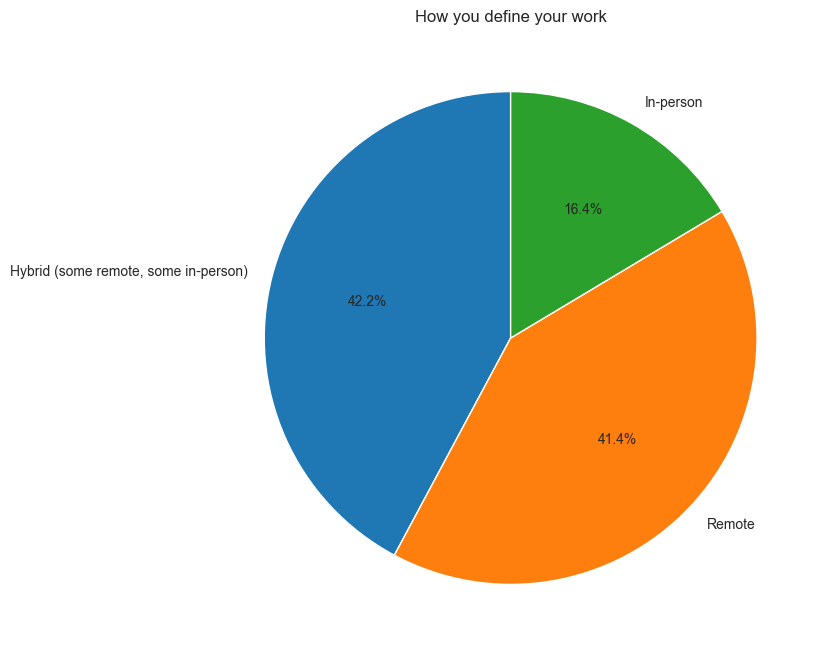

In [58]:
#Making a pie chart
df.plot.pie(autopct="%1.1f%%",
                   startangle=90,
                   figsize=(8,8),
                   ylabel=" ",
                   title="How you define your work")


In this particular section we can see that though it is a gone time of COVID-19. </br>
**Insights**
> * 41.4% of coders are remoter workers but we just saw that the maximum of coders are full-time employed
> * This shoud mean that not only freelancers but also the full-time employed workers are also working remotely.
> * This is also another insight that if they are not remoter workers then they are hybrid so this data can be compared to the trends of the previous year data and should be seen that if there is a linear growth or the COVID time has just jumped up the hybrid and remotworking which is widely been accepted by the countries.
> * 16.4 percent of the coders work in person but it should be kept in mind that in the **DevType** we have seen that there are mnay jobs which can not be operated remotely so over all the companies are trying to adopt the remote wroking

In [59]:
schema_df['AISelect']

'Do you currently use AI tools in your development process? *'

In [60]:
survey_results_df.YearsCode.unique()

array([nan, 18., 27., 12.,  6., 21.,  4.,  5., 20., 14., 10., 15., 11.,
        3., 24.,  8., 13., 16., 33., 22., 30., 32.,  7., 35., 28., 40.,
       17., 29., 19.,  9., 38., 26., 34., 25.,  2., 45., 23., 31., 43.,
        1., 48., 41., 50., 39., 42., 37., 36., 44., 46., 49., 47.])

Text(0.5, 1.0, 'Distribution of Years of Coding Experience')

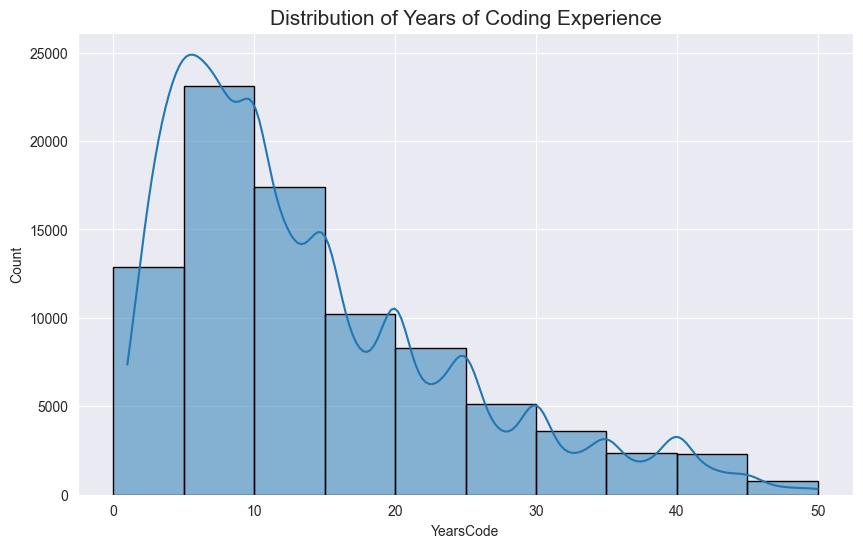

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.histplot(survey_results_df['YearsCode'], bins=range(0, 55, 5), edgecolor='black', kde=True)
plt.title("Distribution of Years of Coding Experience", fontsize=15)


On seeing the above graph we can say that the maximum number of coders have around 5-10 years of coding experience, this makes sense because usually this is the time that is used to gain the required skills althoug the bin of 0-5 years age of coding also has significant coders and that is because it has some students who are a part time coder or just learner.

### Professional Years Experience

Text(0.5, 1.0, 'Distribution of  Professional Years of Coding Experience')

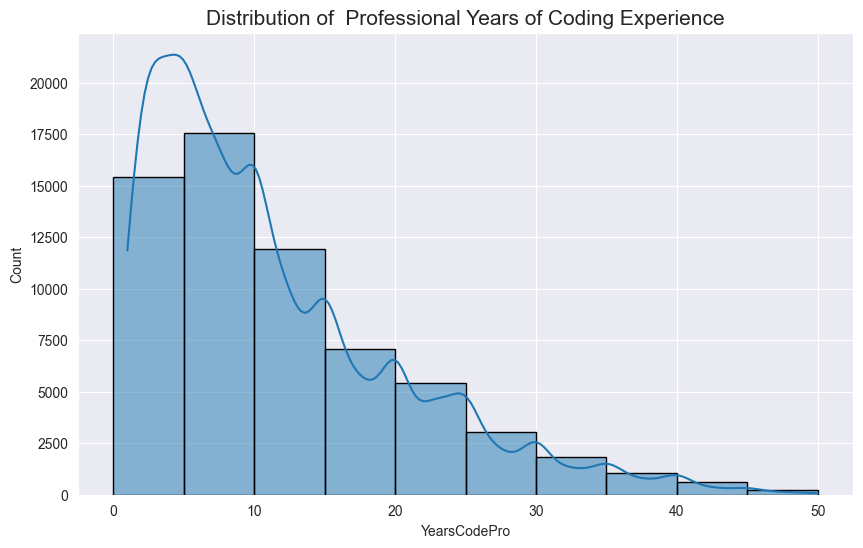

In [62]:
plt.figure(figsize=(10,6))
sns.histplot(survey_results_df['YearsCodePro'], bins=range(0, 55, 5), kde=True, edgecolor='black')
plt.title("Distribution of  Professional Years of Coding Experience", fontsize=15)

Professional years of coding shows a similar trend just the graph is shifted towards the left which shows now that the maximum of the coders have 0-10 years of experience and there are less number of coders in the bin of 10-15 and the graph drops significantly futher. This marks the question why is it so? </br>
The reason could be that before 10 years there may not be that much hiring but also it implicates that it may be the case that coders are not willing to work for more than 10-15 years as a developer.

### Usage Of AI in company

In [63]:
survey_results_df.AISelect.unique()

array([nan, 'Yes', "No, and I don't plan to", 'No, but I plan to soon'],
      dtype=object)

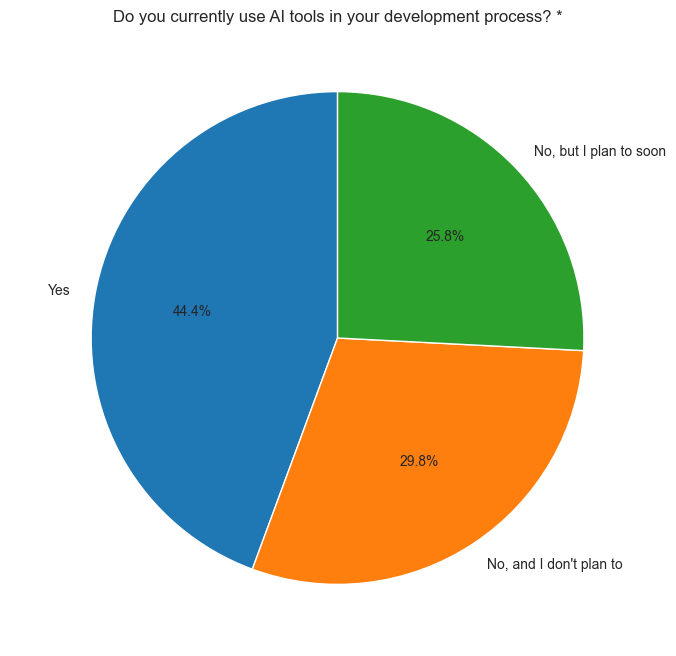

In [64]:
survey_results_df.AISelect.value_counts().plot.pie(autopct="%1.1f%%",
                   startangle=90,
                   figsize=(8,8),
                   ylabel=" ",
                   title=schema_df.AISelect);

Usage of AI in the development process-:</br>
**Insights**
> * Maximum people already use AI for their development process
> * But there are 25.8 percent programmers that are not planning to use AI even in future it would be interesting to find more patterns of these developers and their intersets

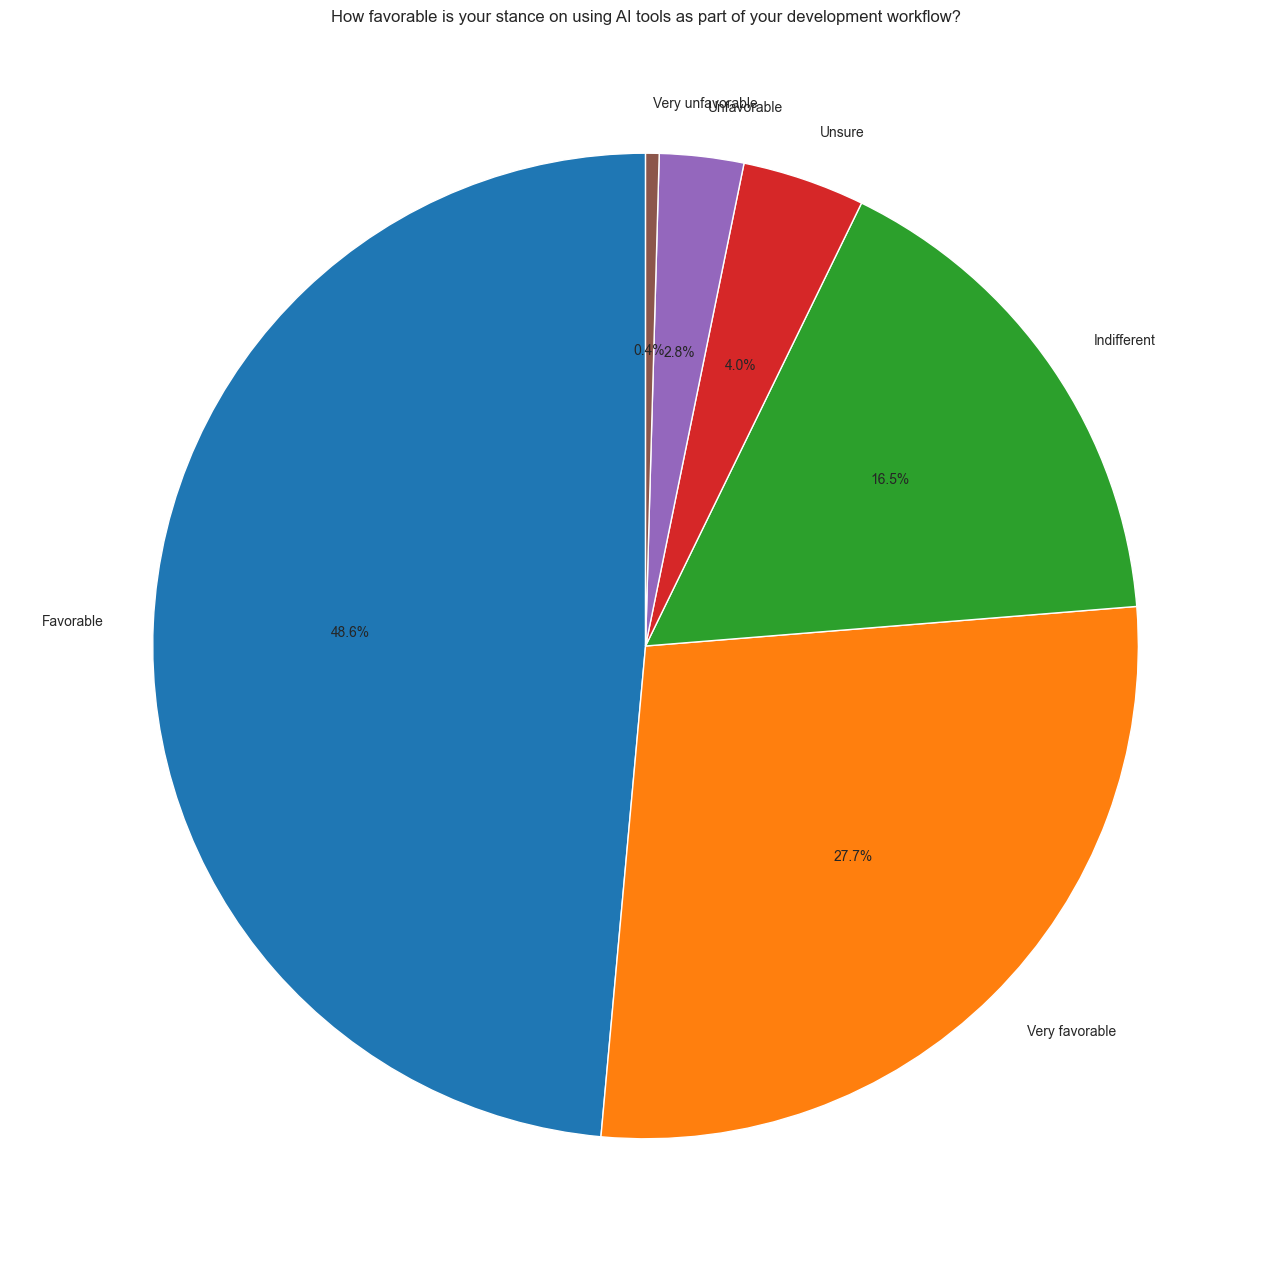

In [65]:
survey_results_df.AISent.value_counts().plot.pie(autopct="%1.1f%%",
                   startangle=90,
                   figsize=(16,16),
                   ylabel=" ",
                   title=schema_df.AISent);

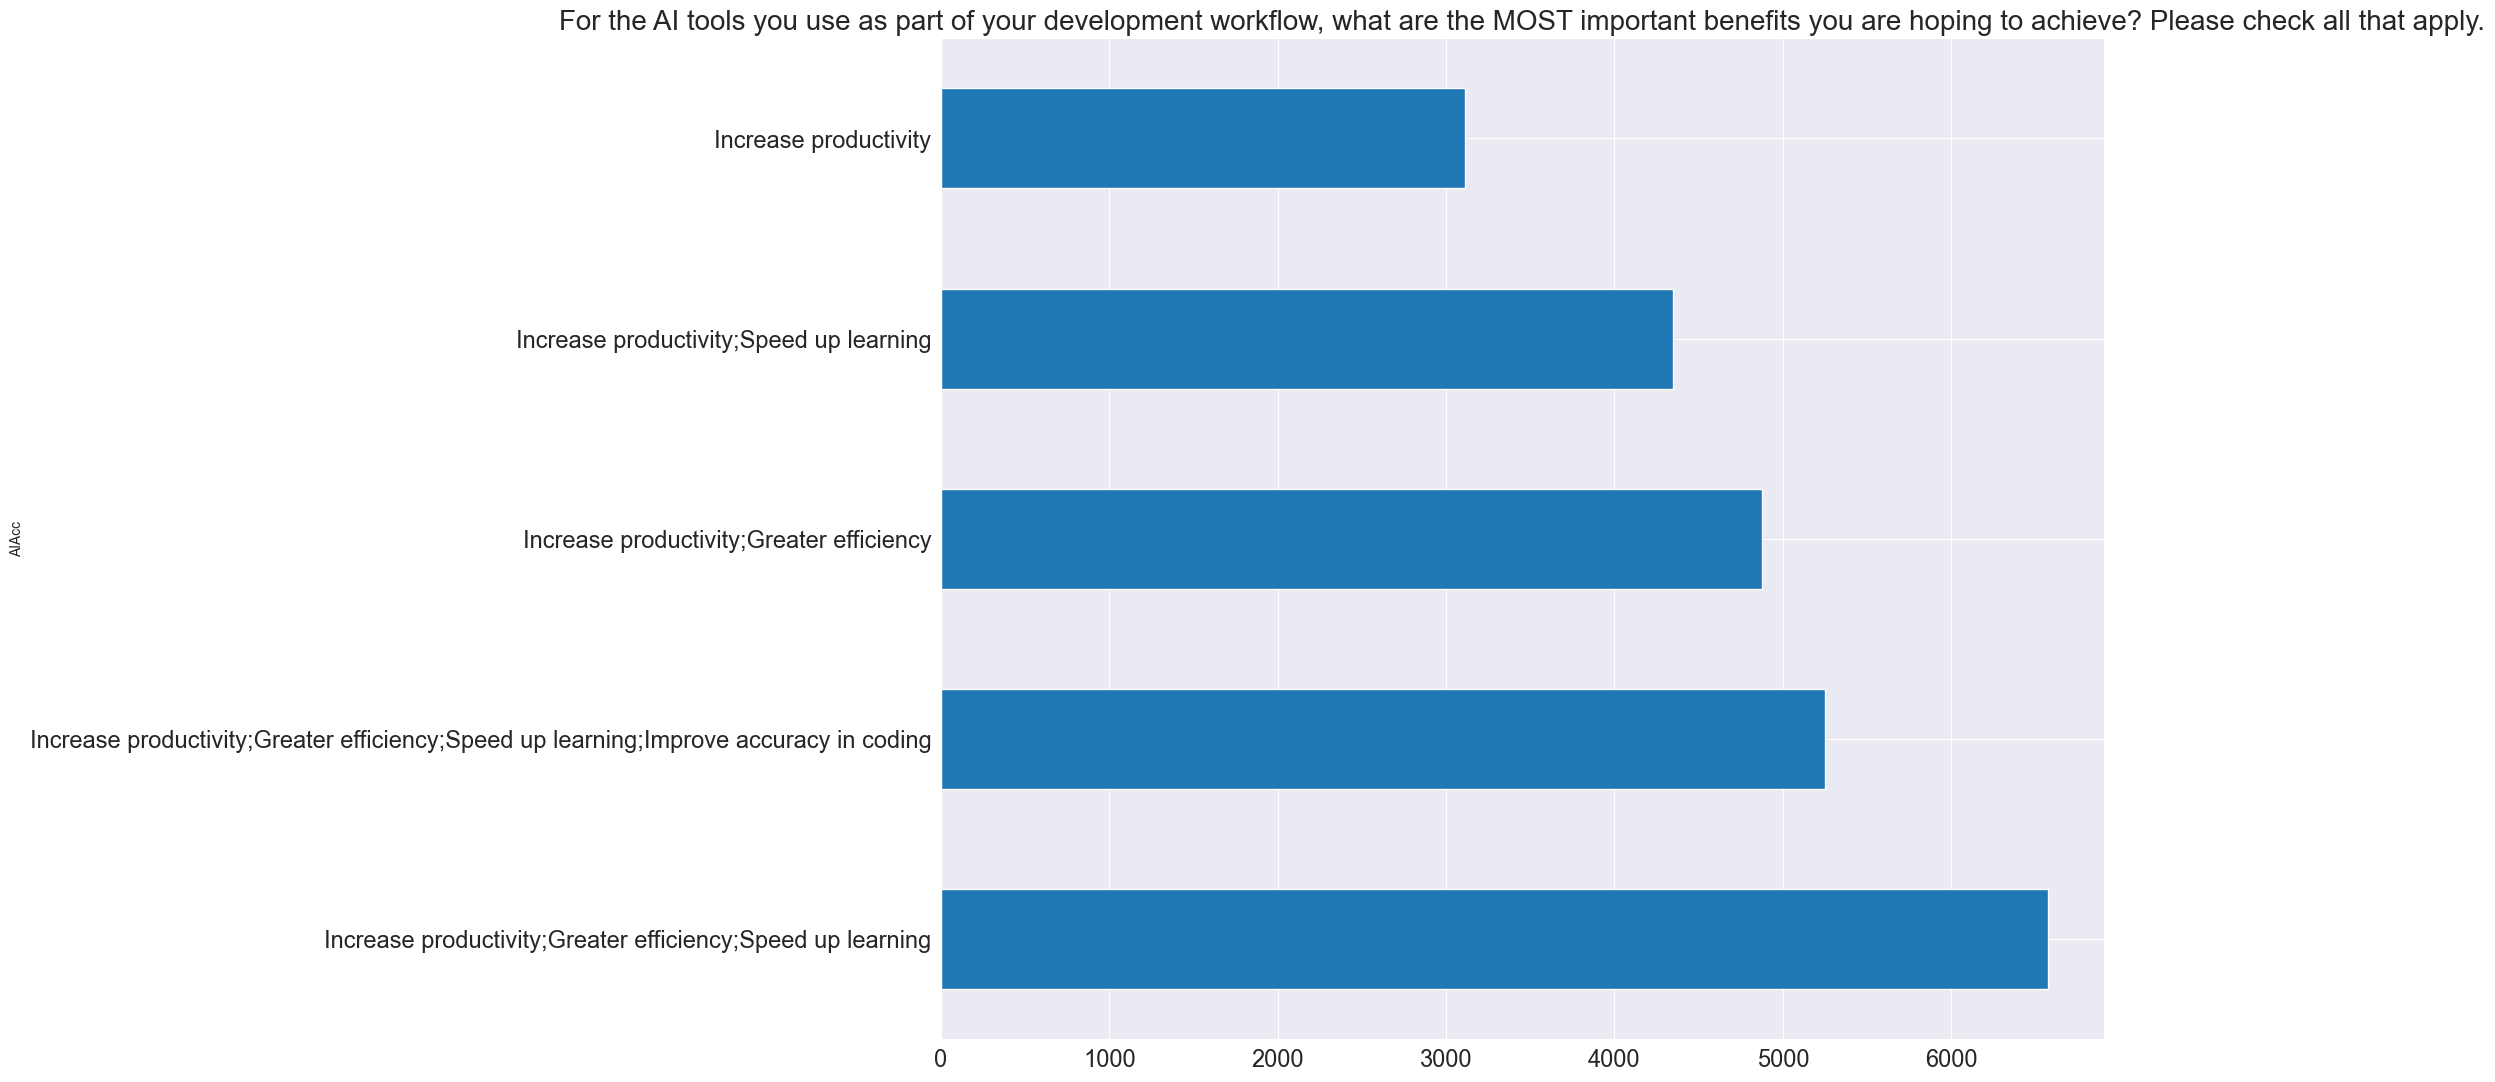

In [66]:
total=survey_results_df.AIAcc.count()
Percentage=survey_results_df.AIAcc.value_counts()/total * 100
data=survey_results_df.AIAcc.value_counts()[Percentage>1]
plt.figure(figsize=(15,13))
a=data.head().plot.barh(fontsize=17)
plt.title(schema_df["AIAcc"],fontsize=20);

### Trust the accuracy of the output from AI tools

In [67]:
schema_df.AIBen

'How much do you trust the accuracy of the output from AI tools as part of your development workflow?'

In [68]:
print(survey_results_df.AIBen.unique())
print(survey_results_df.AIBen.value_counts())

[nan 'Somewhat distrust' 'Somewhat trust' 'Neither trust nor distrust'
 'Highly distrust' 'Highly trust']
AIBen
Somewhat trust                24128
Neither trust nor distrust    18837
Somewhat distrust             13330
Highly distrust                3350
Highly trust                   1751
Name: count, dtype: int64


Text(0.5, 1.0, 'How much do you trust the accuracy of the output from AI tools as part of your development workflow?')

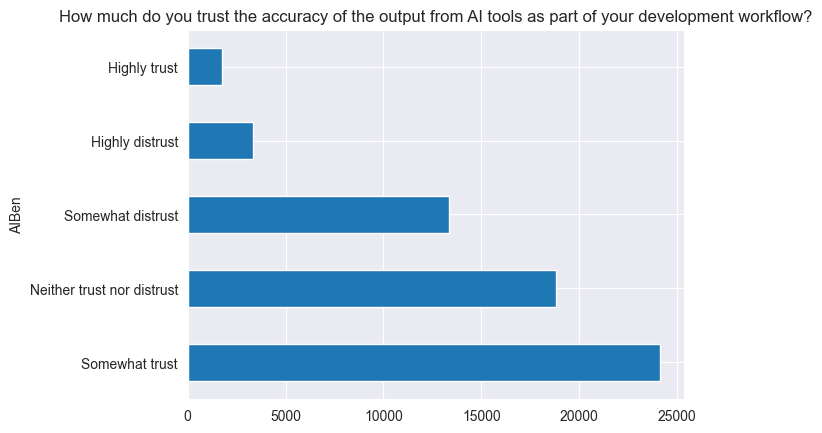

In [69]:

survey_results_df.AIBen.value_counts().plot.barh()
plt.title(schema_df["AIBen"])